# Iris Dataset Visualization  

#### This Project involves Different type to analysis on Iris Flower and about its different spieces.

In [296]:
# importing all the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
import warnings as w

In [297]:
# w.filterwarnings("ignore")  
# To ignore unnecessary warning by interpretator 

In [298]:
# importing the data set and converting into dataframe
df = pd.read_csv('iris.csv')
print('No. of Rows the dataset    :  ' ,df.shape[0], '\nNo. of Columns the dataset :  ', df.shape[1])

No. of Rows the dataset    :   150 
No. of Columns the dataset :   5


##### >> First 10 records of our dataset

##### Checking all the names of columns present in our dataset

In [299]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [300]:
df.head(10)  # Just to check first 10 records

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


##### 10 random samples from our dataset 

In [301]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
74,6.4,2.9,4.3,1.3,versicolor
15,5.7,4.4,1.5,0.4,setosa
85,6.0,3.4,4.5,1.6,versicolor
47,4.6,3.2,1.4,0.2,setosa
137,6.4,3.1,5.5,1.8,virginica
45,4.8,3.0,1.4,0.3,setosa
118,7.7,2.6,6.9,2.3,virginica
58,6.6,2.9,4.6,1.3,versicolor
144,6.7,3.3,5.7,2.5,virginica
97,6.2,2.9,4.3,1.3,versicolor


##### Checking null values in all the columns

In [302]:
df.isna().sum()     # This shows our data does not contains any kind of null values.

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [303]:
for x in df.columns:                    # Checking the datatype of all the columns its
    print(x,'------',df[x].dtype)       # important to know that every columns should have correct dtype. 

sepal_length ------ float64
sepal_width ------ float64
petal_length ------ float64
petal_width ------ float64
species ------ object


##### After appling  above different steps, it has concluded that data is 100% clean and good to go for further analysis

In [304]:
df['species'].unique()  # to see all the different or unique species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

##### Statistical Overview

In [305]:
df.describe()   # This Method hepls us to check a quick statistical attributes of the dataset

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### Finding some aggregates category wise of different spieces.  

In [306]:
print('Maximum Values of sepal Length from different speices \n',df.groupby('species')['sepal_length'].max())
print('\nMinimum Values of sepal Length from different speices \n',df.groupby('species')['sepal_length'].min())
print('\nMean Values of sepal Length from different speices \n',df.groupby('species')['sepal_length'].mean())   

Maximum Values of sepal Length from different speices 
 species
setosa        5.8
versicolor    7.0
virginica     7.9
Name: sepal_length, dtype: float64

Minimum Values of sepal Length from different speices 
 species
setosa        4.3
versicolor    4.9
virginica     4.9
Name: sepal_length, dtype: float64

Mean Values of sepal Length from different speices 
 species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64


##### Checking outlier values in different columns

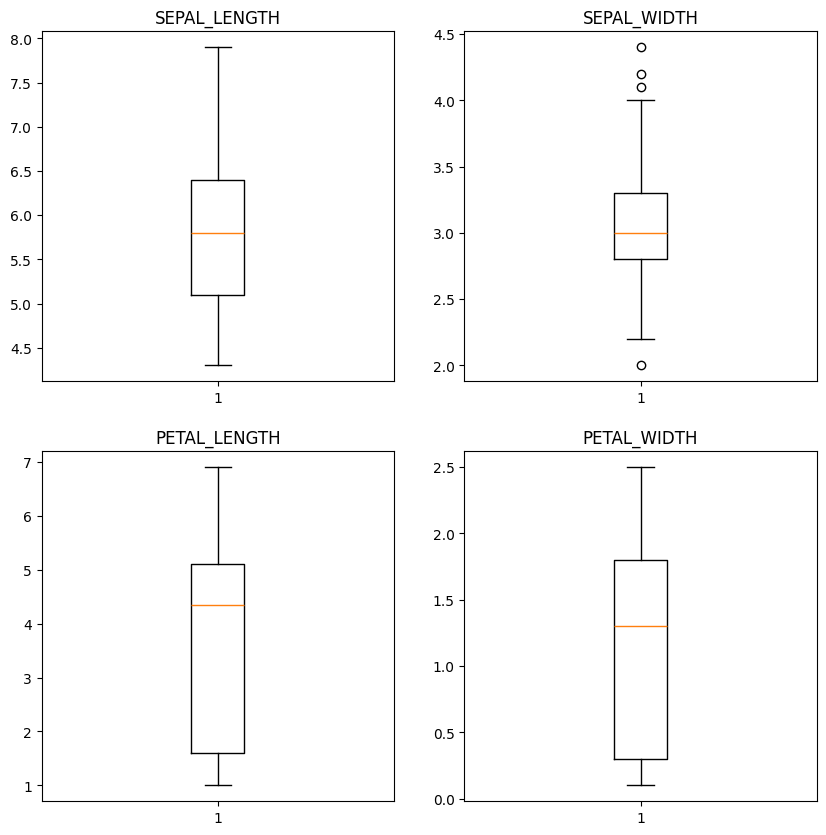

In [307]:
plt.figure(figsize=(10,10))
counter=1
for x in df.columns:
    if df[x].dtype == 'float64':
        plt.subplot(2, 2, counter)
        plt.title(x.upper())
        plt.boxplot(df[x])
        counter+=1
plt.show()


##### The Above Figure shows that Sepal_width columns contains some outlier values that needs to removed for better analysis

In [308]:
print(df['sepal_width'].describe())     
# By using this method we can easily identify minimum and maximum values according to IQR. 
# Any value outside this range will be treated has outlier of the data set.
# So we got our min value i.e 2.00 and max value i.e 4.40
mx_val = 4.4
mn_val = 2

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64


In [309]:
def outliers(x):
    global mn_val
    global mx_val
    if mn_val < x < mx_val:
        return x
    else:
        return 0
df['sepal_width'] = df['sepal_width'].apply(outliers)

In [310]:
df[df['sepal_width']==0]
# we have found that some values are being replaced by Zero that were outliers erliair

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,0.0,1.5,0.4,setosa
60,5.0,0.0,3.5,1.0,versicolor


In [311]:
df['sepal_width'] = df['sepal_width'].replace({0:df['sepal_width'].mean()}) # Replacing Zero Values with mean of the datset

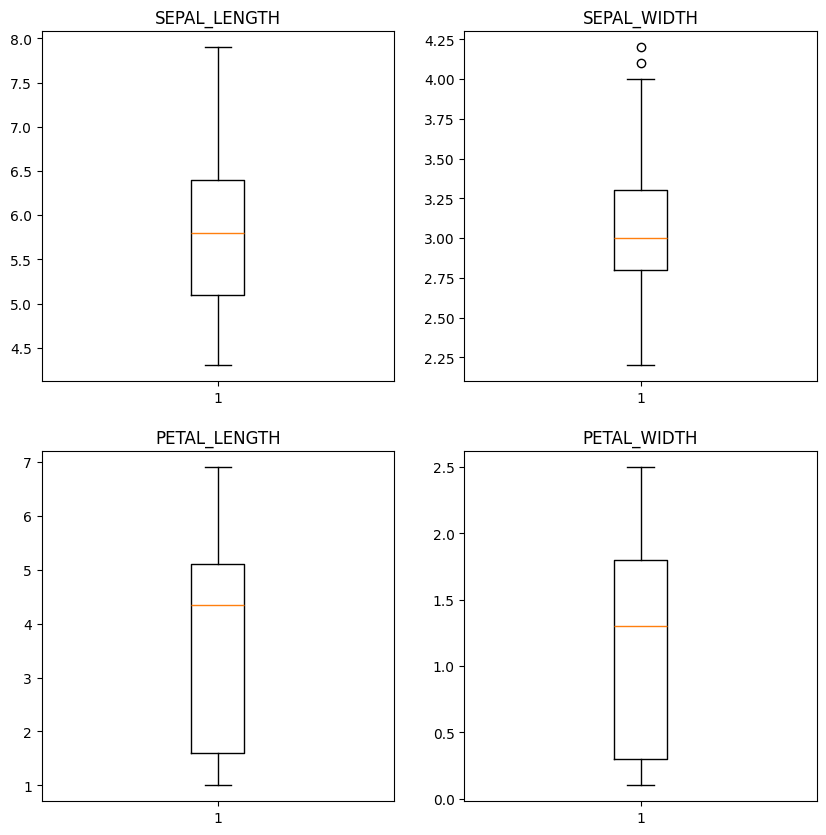

In [312]:
plt.figure(figsize=(10,10))
counter=1
for x in df.columns:
    if df[x].dtype == 'float64':
        plt.subplot(2, 2, counter)
        plt.title(x.upper())
        plt.boxplot(df[x])
        counter+=1
plt.show()


##### By doing above steps we have removed all the outliers present in our dataset
##### Now dataset in ready to Analysed in form of Graph 

In [343]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
38,4.4,3.0,1.3,0.2,setosa
22,4.6,3.6,1.0,0.2,setosa
71,6.1,2.8,4.0,1.3,versicolor
75,6.6,3.0,4.4,1.4,versicolor
106,4.9,2.5,4.5,1.7,virginica
67,5.8,2.7,4.1,1.0,versicolor
2,4.7,3.2,1.3,0.2,setosa
146,6.3,2.5,5.0,1.9,virginica
74,6.4,2.9,4.3,1.3,versicolor
117,7.7,3.8,6.7,2.2,virginica


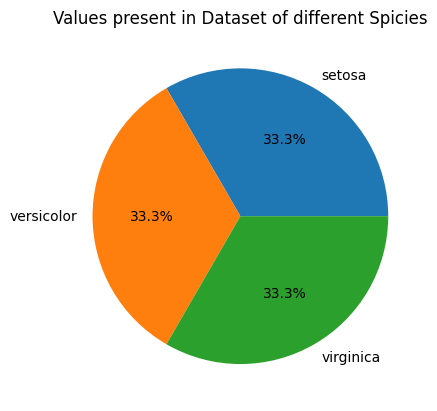

In [338]:
plt.pie(x=df.species.value_counts(),labels=df['species'].unique(),autopct='%1.1f%%')
plt.title('Values present in Dataset of different Spicies')
plt.show()

<BarContainer object of 3 artists>

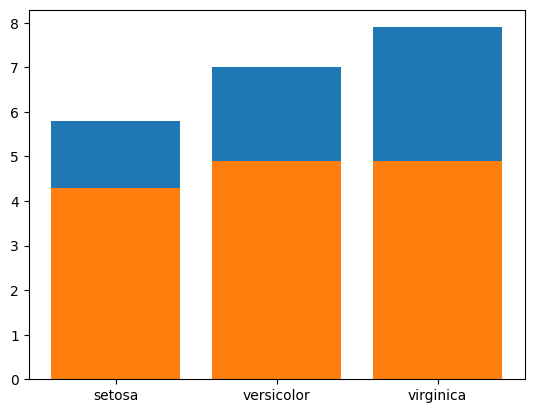

In [350]:
plt.bar(df.groupby('species')['sepal_length'].max().index,df.groupby('species')['sepal_length'].max())
plt.bar(df.groupby('species')['sepal_length'].min().index,df.groupby('species')['sepal_length'].min())

<BarContainer object of 3 artists>

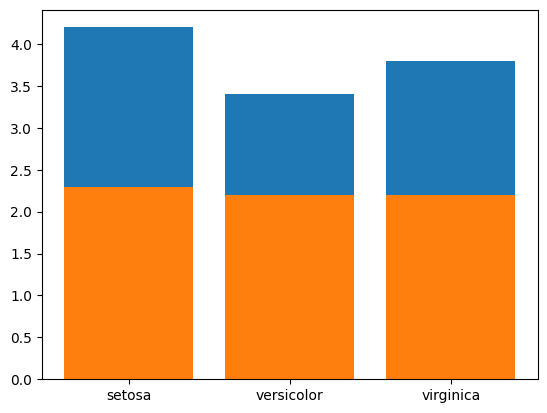

In [351]:
plt.bar(df.groupby('species')['sepal_width'].max().index,df.groupby('species')['sepal_width'].max())
plt.bar(df.groupby('species')['sepal_width'].min().index,df.groupby('species')['sepal_width'].min())

<BarContainer object of 3 artists>

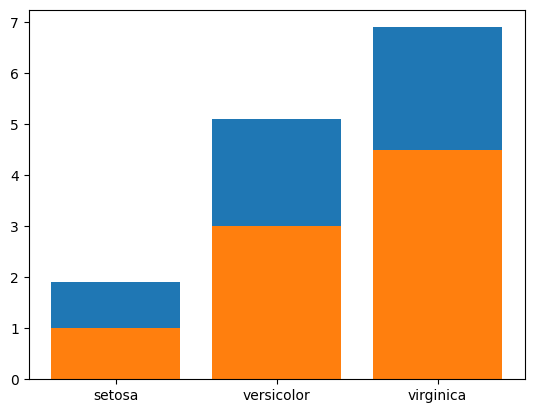

In [353]:
plt.bar(df.groupby('species')['petal_length'].max().index,df.groupby('species')['petal_length'].max())
plt.bar(df.groupby('species')['petal_length'].min().index,df.groupby('species')['petal_length'].min())

<BarContainer object of 3 artists>

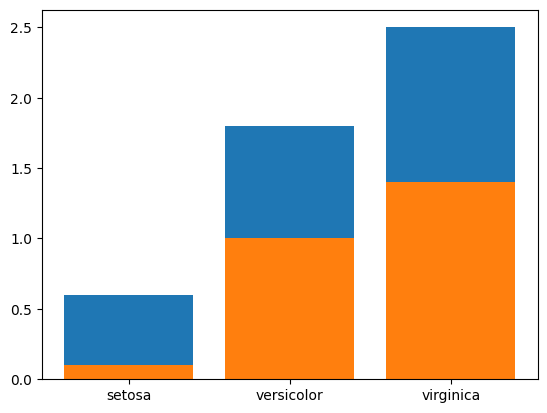

In [352]:
plt.bar(df.groupby('species')['petal_width'].max().index,df.groupby('species')['petal_width'].max())
plt.bar(df.groupby('species')['petal_width'].min().index,df.groupby('species')['petal_width'].min())

In [354]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


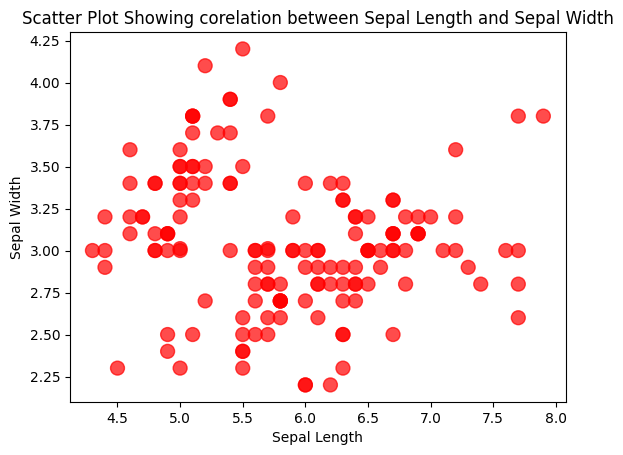

In [365]:
# Showing corelation between Sepal Length and Sepal Width 
colors = ['red' if sl > sw else 'blue' for sl, sw in zip(df['sepal_length'], df['sepal_width'])]
plt.scatter(df['sepal_length'], df['sepal_width'], c=colors, s=100, alpha=0.7)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot Showing corelation between Sepal Length and Sepal Width')
plt.show()


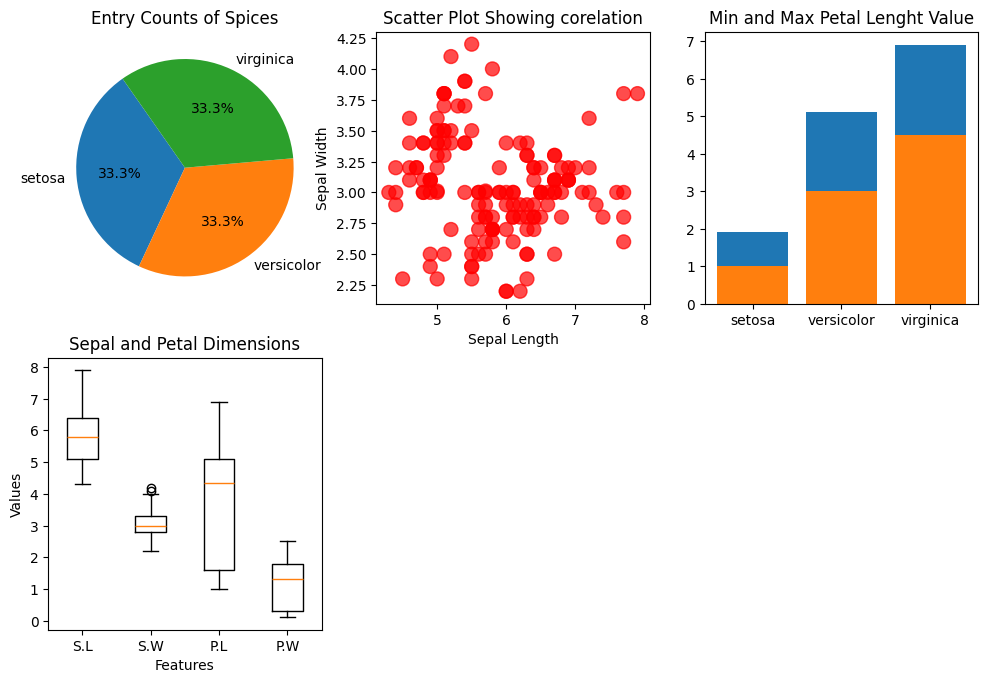

In [389]:
plt.figure(figsize=(12,12))

plt.subplot(3, 3, 1)
plt.title('Entry Counts of Spices')
plt.pie(x=df.species.value_counts(),labels=df['species'].unique(),autopct='%1.1f%%',startangle=125)
# plt.title('Values present in Dataset of different Spicies')

plt.subplot(3, 3, 2)
plt.title('Scatter Plot Showing corelation')
colors = ['red' if sl > sw else 'blue' for sl, sw in zip(df['sepal_length'], df['sepal_width'])]
plt.scatter(df['sepal_length'], df['sepal_width'], c=colors, s=100, alpha=0.7)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.subplot(3, 3, 3)
plt.title('Min and Max Petal Lenght Value')
plt.bar(df.groupby('species')['petal_length'].max().index,df.groupby('species')['petal_length'].max())
plt.bar(df.groupby('species')['petal_length'].min().index,df.groupby('species')['petal_length'].min())

plt.subplot(3, 3, 4)

data = [df['sepal_length'], df['sepal_width'], df['petal_length'], df['petal_width']]
labels = ['S.L', 'S.W', 'P.L', 'P.W']
plt.boxplot(data, positions=[1, 2, 3, 4], labels=labels)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Sepal and Petal Dimensions')

plt.show()

